In [4]:
import psycopg2
import pandas as pd
import numpy as np
from IPython.display import Image
from IPython.core.display import HTML
from IPython.core.display import display, HTML
from IPython.display import HTML
import random
hide_toggle()


In [5]:
def hide_toggle(for_next=False):
    this_cell = """$('div.cell.code_cell.rendered.selected')"""
    next_cell = this_cell + '.next()'
    toggle_text = 'Toggle show/hide'  # text shown on toggle link
    target_cell = this_cell  # target cell to control with toggle
    js_hide_current = ''  # bit of JS to permanently hide code in current cell (only when toggling next cell)
    if for_next:
        target_cell = next_cell
        toggle_text += ' next cell'
        js_hide_current = this_cell + '.find("div.input").hide();'
    js_f_name = 'code_toggle_{}'.format(str(random.randint(1,2**64)))
    html = """
        <script>
            function {f_name}() {{
                {cell_selector}.find('div.input').toggle();
            }}
            {js_hide_current}
        </script>
        <a href="javascript:{f_name}()">{toggle_text}</a>
    """.format(
        f_name=js_f_name,
        cell_selector=target_cell,
        js_hide_current=js_hide_current,
        toggle_text=toggle_text
    )
    return HTML(html)
hide_toggle()


In [7]:
def select_query(query):
    df = pd.read_sql_query(query, conn, coerce_float=False)
    df.replace([None], np.nan, inplace=True)

    return df
hide_toggle()


In [8]:
def display_side_by_side(dfs: list, captions: list):
    """Display tables side by side to save vertical space
    Input:
        dfs: list of pandas.DataFrame
        captions: list of table captions
    """

    output = ""
    combined = dict(zip(captions, dfs))
    for caption, df in combined.items():
        output += df.style.set_table_attributes("style='display:inline'")\
                    .set_caption(caption)._repr_html_()
        output += "\xa0\xa0\xa0"
    display(HTML(output))

hide_toggle()


In [9]:
# CHANGE INFO TO RUN ON YOUR LOCAL
host = "127.0.0.1"
port = "5432"
database = "MSDS691"
# database = 'msds691'
user = "postgres"
hide_toggle()


In [10]:
conn = psycopg2.connect(host=host, port=port, database=database, user=user)
cur = conn.cursor()
hide_toggle()


In [11]:
cur.execute(f'''DROP TABLE IF EXISTS names;''')
cur.execute(f'''DROP TABLE IF EXISTS transactions;''')
hide_toggle()


In [12]:
create = f'''

DROP TABLE IF EXISTS names;

CREATE TABLE names
(id INTEGER,
name VARCHAR,
PRIMARY KEY (id))
;

INSERT INTO names
VALUES
(1, 'Jon Smith'),
(2, 'Sarah Adams'),
(3, 'Maria Lopez')
;'''

cur.execute(create)
conn.commit()

create = f'''

DROP TABLE IF EXISTS transactions;

CREATE TABLE transactions
(id INTEGER,
 amount NUMERIC,
 PRIMARY KEY (id))
;

INSERT INTO transactions
VALUES
(1, 10),
(3, 20),
(7, 50)
;'''

cur.execute(create)
conn.commit()
hide_toggle()


### General Join Syntax

SELECT <br>
[Field Names] <br>
FROM TableA A <br>
[Join Type] JOIN <br>
TableB B <br>
ON A.key=B.key <br>

### select * names


In [13]:
query = f'''

SELECT *
FROM names

;'''
df_names = select_query(query)
df_names


,id,name
0,1,Jon Smith
1,2,Sarah Adams
2,3,Maria Lopez


### select * transactions

In [14]:
query = f'''

SELECT *
FROM transactions

;'''
df_transactions = select_query(query)
df_transactions


,id,amount
0,1,10
1,3,20
2,7,50


### Inner Join

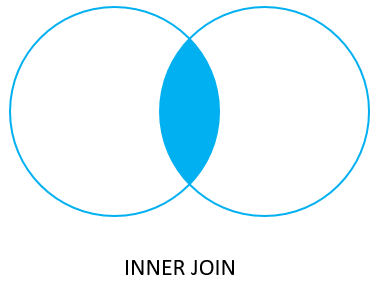

In [55]:
Image(filename= "images/inner_join.png", width=200)

In [39]:
query = f'''

SELECT  
names.id, 
names.name, 
transactions.amount
FROM names 
    INNER JOIN transactions
        ON (names.id = transactions.id)

;'''
df_inner_join = select_query(query)
display_side_by_side([df_names, df_transactions, df_inner_join],
                     ['Left Table', 'Right Table', 'Inner Join Output'])


### Left Join

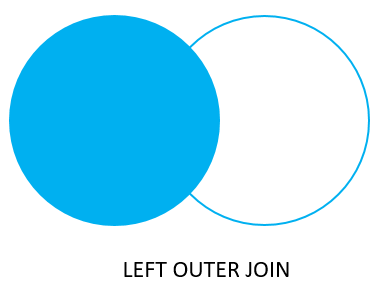

In [56]:
Image(filename= "images/left_join.png", width=200)

In [16]:
query = f'''

SELECT  
names.id, 
names.name, 
transactions.amount
FROM names 
    LEFT JOIN transactions
        ON (names.id = transactions.id)

;'''
df_left_join = select_query(query)
display_side_by_side([df_names, df_transactions, df_left_join],
                     ['Left Table', 'Right Table', 'Left Join Output'])


### Right Join

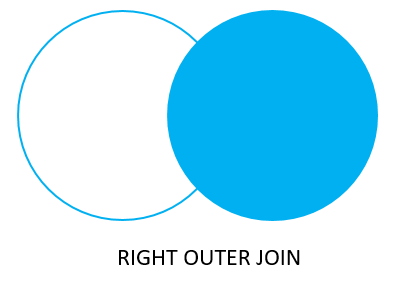

In [48]:
Image(filename= "images/right_join.png", width=200)

In [17]:
query = f'''

SELECT  
transactions.id, 
names.name, 
transactions.amount
FROM names 
    RIGHT JOIN transactions
        ON (names.id = transactions.id)

;'''
df_right_join = select_query(query)
display_side_by_side([df_names, df_transactions, df_right_join],
                     ['Left Table', 'Right Table', 'Right Join Output'])


### Full Join

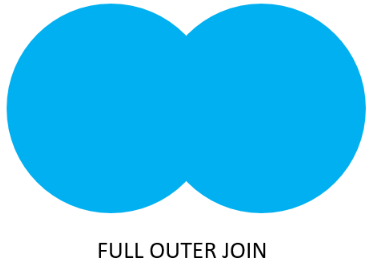

In [50]:
Image(filename= "images/full_join.png", width=200)

In [18]:
query = f'''

SELECT 
COALESCE(names.id,transactions.id) as id,
names.name, 
transactions.amount
FROM names 
    FULL JOIN transactions
        ON (names.id = transactions.id)

;'''
df_full_join = select_query(query)
display_side_by_side([df_names, df_transactions, df_full_join],
                     ['Left Table', 'Right Table', 'Full Join Output'])


### Cross Join

In [19]:
query = f'''

SELECT *
FROM names 
    CROSS JOIN transactions

;'''
df_cross_join = select_query(query)
df_cross_join


,id,name,id,amount
0,1,Jon Smith,1,10
1,1,Jon Smith,3,20
2,1,Jon Smith,7,50
3,2,Sarah Adams,1,10
4,2,Sarah Adams,3,20
5,2,Sarah Adams,7,50
6,3,Maria Lopez,1,10
7,3,Maria Lopez,3,20
8,3,Maria Lopez,7,50


### Join 3 Tables

### Add dob_table

In [20]:
create = f'''
DROP TABLE IF EXISTS dob_table;


CREATE TABLE dob_table
(id INTEGER,
 dob date,
 PRIMARY KEY (id));

INSERT INTO dob_table
VALUES
(1, '1982-09-29'),
(3, '1996-02-16')
;'''

cur.execute(create)
conn.commit()

hide_toggle()

### select * dob_table

In [22]:
query = f'''

SELECT *
FROM dob_table

;'''
df_dob = select_query(query)
df_dob


,id,dob
0,1,1982-09-29
1,3,1996-02-16


### Query: 3 Table Join

In [23]:
query = f'''

SELECT  
names.id, 
names.name, 
transactions.amount, 
dob_table.dob
FROM names
    INNER JOIN transactions
        ON (names.id = transactions.id)
    INNER JOIN dob_table
        ON (names.id = dob_table.id)

;'''
df_three_tables = select_query(query)
display_side_by_side([df_names, df_transactions, df_dob, df_three_tables],
                     ['names', 'transactions', 'dob', 'all three tables'])


,id,name
0,1,Jon Smith
1,2,Sarah Adams
2,3,Maria Lopez
,id,amount
0,1,10
1,3,20
2,7,50
,id,dob
0,1,1982-09-29
1,3,1996-02-16





### One-to-One | One-to-Many | Many-to-Many

In [24]:
Image(url= "images/one_to_one.png")

### Add long_transactions table

In [25]:
create = f'''

DROP TABLE IF EXISTS long_transactions;

CREATE TABLE long_transactions
(id INTEGER,
amount NUMERIC);

INSERT INTO long_transactions
VALUES
(1, 45),
(1, 10),
(2, 10),
(3, 20),
(3, 50),
(7, 50)
;'''
cur.execute(create)
conn.commit()
hide_toggle()


### select * long_transactions

In [51]:
query = f'''

SELECT  *
FROM long_transactions

;'''
df_long_tran = select_query(query)
df_long_tran


,id,amount
0,1,45
1,1,10
2,2,10
3,3,20
4,3,50
5,7,50


### One-to-many

In [27]:
query = f'''

SELECT  
names.id, 
names.name, 
long_transactions.amount
FROM names 
    LEFT JOIN long_transactions
        ON (names.id = long_transactions.id)

;'''
df_one_many = select_query(query)
display_side_by_side([df_names, df_long_tran, df_one_many],
                     ['names', 'transactions', 'One-to-many'])
hide_toggle()


,id,name
0,1,Jon Smith
1,2,Sarah Adams
2,3,Maria Lopez
,id,amount
0,1,45
1,1,10
2,2,10
3,3,20
4,3,50
5,7,50


### Many-to-Many

### Add long_amounts table

In [14]:
create = f'''

DROP TABLE IF EXISTS long_amounts;

CREATE TABLE long_amounts
(amount NUMERIC,
 item VARCHAR);

INSERT INTO long_amounts
VALUES
(10, 'toy'),
(10, 'postcard'),
(50, 'shirt'),
(20, 'cards'),
(20, 'other cards'),
(70, 'pants')
;'''
cur.execute(create)
conn.commit()
hide_toggle()


### select * long_amounts

In [52]:
query = f'''

SELECT  
*
FROM long_amounts

;'''
df_long_amount = select_query(query)
df_long_amount


,amount,item
0,10,toy
1,10,postcard
2,50,shirt
3,20,cards
4,20,other cards
5,70,pants


In [29]:
query = f'''

SELECT  
long_transactions.id,
long_transactions.amount,
long_amounts.item
FROM long_transactions 
    INNER JOIN long_amounts
        ON (long_transactions.amount = long_amounts.amount)

;'''
df_many_many = select_query(query)
display_side_by_side([df_long_tran, df_long_amount, df_many_many],
                     ['long_transactions', 'long_amounts', 'Many-to-Many'])
hide_toggle()


,id,amount
0,1,45
1,1,10
2,2,10
3,3,20
4,3,50
5,7,50
,amount,item
0,10,toy
1,10,postcard
2,50,shirt


In [31]:
cur.close()
conn.close()
hide_toggle()
